## Example using kg

In [1]:
import pathlib,sys,itertools
sys.path.append('D:\GitHub\myKG')
from kg.measurement_values import measuredValues
from kg.measurement_signal import measuredSignal
from kg.detect import *
from kg.algorithm import *
from kg.case import Case
from kg.widgets import DetectControlWidget
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


setup measurement main directory 'D:\GitHub\myKG\Measurements_example\MBBMZugExample'



In [2]:
mesPath = pathlib.Path('D:\GitHub\myKG\Measurements_example\MBBMZugExample')
mesVal = measuredValues.from_json(mesPath.as_posix())
measuredSignal.setup(mesPath.as_posix())

list all variables in **mesVal**

In [3]:
mesVal.list_variables()

,description,variable
0,Regen in elektrische spannung?,rain
1,Temperatur in [K],Temp
2,Relative Feuchte in %,humidity
3,Zugsart erkennt aus achsmunster. Achsmunster w...,trainType
4,"Fahrtrichtung, 1 sud,0 nord",direction
5,Geschwindigkeit erstes Drehgestell,v1
6,Windgeschwindigkeit in [m/s],wind
7,Gleis im zug; von 1 bis 4,Gleis
8,Datum der Vorbeifahrt,mDate
9,None,axleProLenght


### Initiate micSignal Object
parameter: ID, mic, signal,values

In [4]:
mID ='m_0100'
mics = [1,6]
micSn = [MicSignal.from_measurement(mesVal, mID, mic) for mic in mics]
#y, t, sR = mesSn.get_signal(mic)
#values = mesVal.get_variables_values(mID, mic, [ 'Tb','Te','Tp_b','Tp_e','LAEQ'])
#print(values)
#micSn = MicSignal(mID, mic, y, t, sR, values)

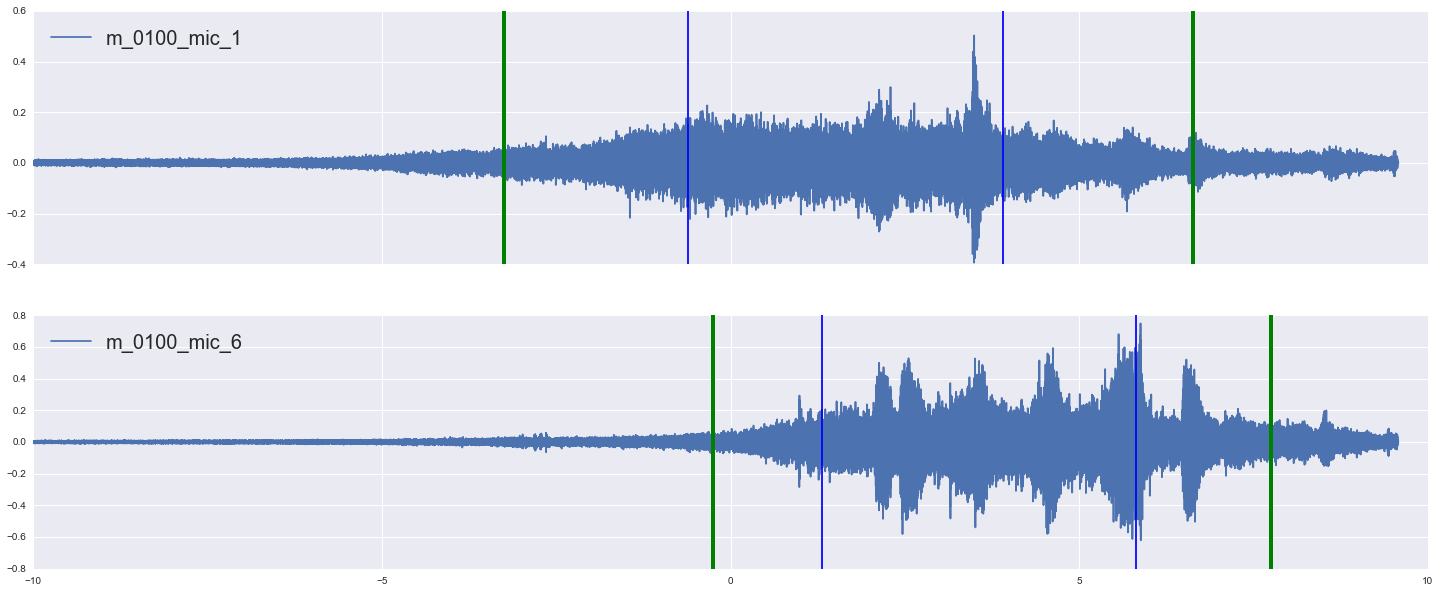

In [5]:
figsize(25,10)
fig, axes = plt.subplots(len(mics), sharex = True)
for i, Sn in enumerate(micSn):
    ax = axes[i]
    Sn.plot_signal(ax)
    Sn.plot_triggers(ax,color='green',lw=4)
    Sn.plot_triggers(ax,type = 'passby')
    ax.legend(loc=2,prop={'size':20})

### Initiate algorithm 
with parameter

In [6]:
algorithms =[ZischenDetetkt1(3000,0,0.02), ZischenDetetkt1(2000,0,0.05)]
print(repr(algorithms[0]))

ZischenDetetkt1
description: implement the Algorithm:
        1: stft -> X(k,i)
        2: calculate power per bands for every t_i
        3: build band power ratio (BPR) and compare to threshold for every t_i
        
parameter:
{'fmin': 200, 'dt': 0.02, 'threshold': 0, 'overlap': 2, 'fc': 3000, 'fmax': 12000}


In [7]:
for alg,Sn in itertools.product(algorithms,micSn):
    Sn.calc_kg(alg)

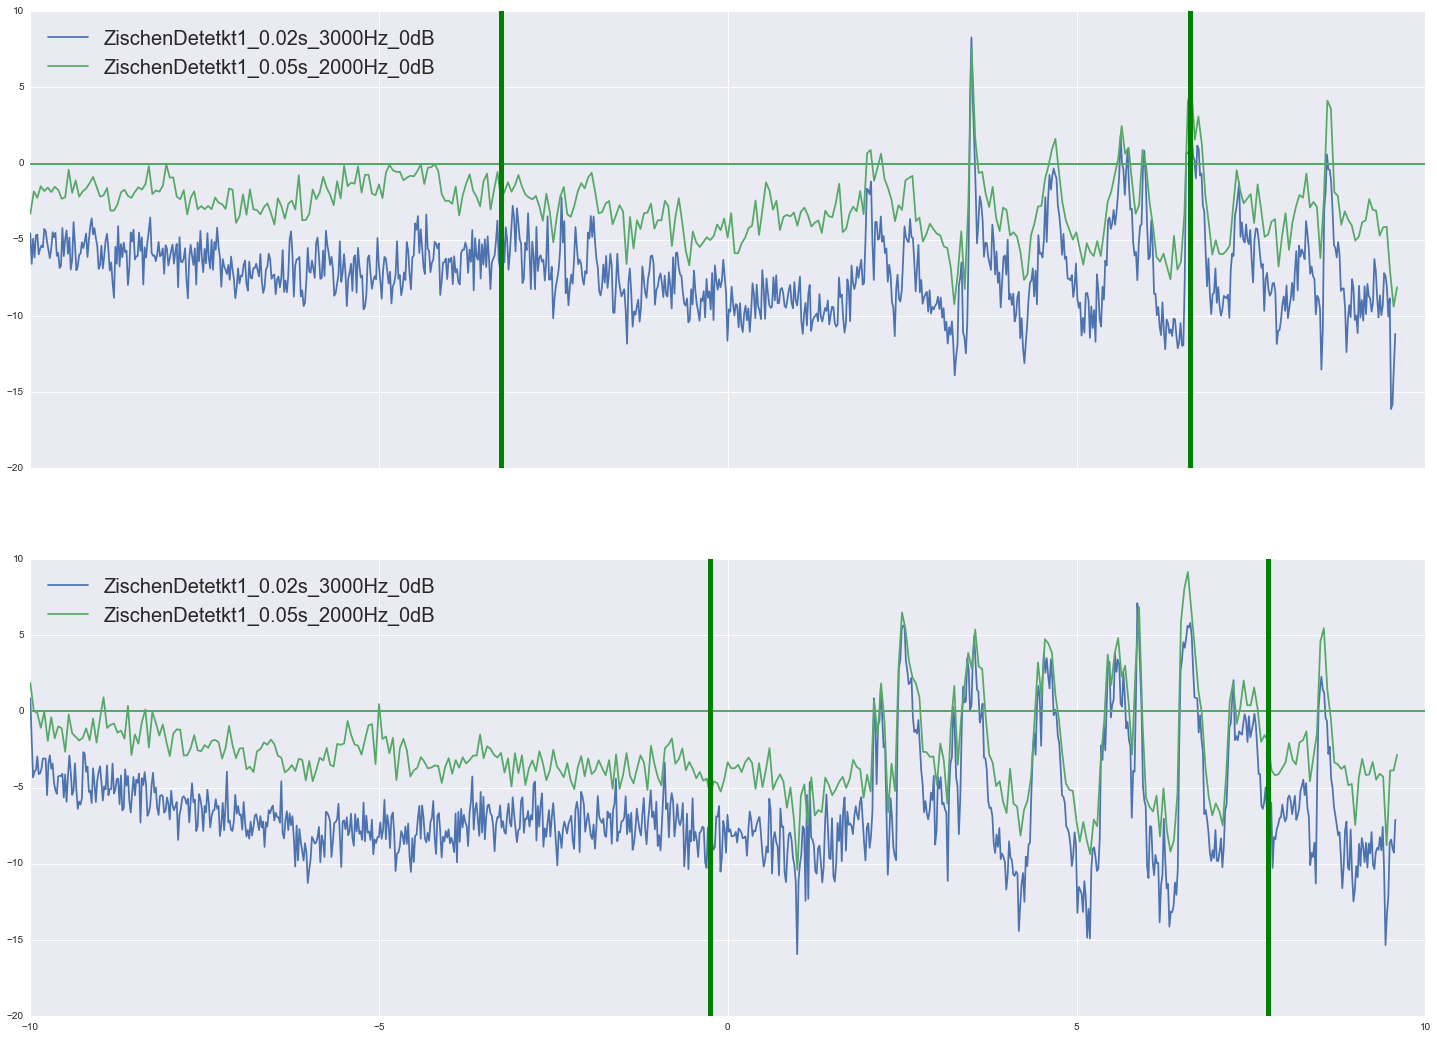

In [8]:
figsize(25,18)
fig,axes =plt.subplots(len(micSn),sharex= True)
for i, Sn in enumerate(micSn):
    ax = axes[i]
    for alg in algorithms:
        Sn.plot_BPR(alg,ax)
    Sn.plot_triggers(ax,color='green',lw=5)
    ax.legend(loc=2,prop={'size':20})

### Test algorithms on cases

In [9]:
cases = [Case.from_JSON(cP) for cP in [mesPath.joinpath('test_cases\esr\case_m_0100_1_esr.json').as_posix()]]

empty list


In [10]:
for alg,Sn in itertools.product(algorithms,micSn):
    alg.test_on_case(cases[0],mesVal)
    alg.calc_rates()
    print(alg.rates)

AssertionError: 

In [ ]:
algor

In [ ]:
cases[0]

## get results and set to mesValues

In [ ]:
for alg,Sn in itertools.product(algorithms,micSn):
    mesVal.set_kg_values(alg,**Sn.get_KG_results(alg))

In [ ]:
%gui qt
W = DetectControlWidget.alg_results(micSn[2], algorithms[0])
W.show()

#### Save kg results to json

In [ ]:
mesVal.kg_values_to_json()